In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MetropolisND(x0, h, n_dim, n_trials, f, alpha):
  samples = np.zeros((n_trials,n_dim))
  samples[0,:] = x0
  Ri = samples[0,:]
  total_trials = 1
  while(total_trials < n_trials):
    R_trial = np.zeros(Ri.shape)
    j = 0
    while (j < R_trial.shape[0]):
      R_trial[j] = np.random.uniform(low = Ri[j] - h/2, high = Ri[j] + h/2)
      j = j+1
    total_trials += 1
    r = (f(R_trial,alpha,n_dim)/f(Ri, alpha, n_dim))
    if(r>=1):
      Ri = R_trial
      samples[total_trials-1, :] = Ri
    else:
      eta = np.random.uniform(low = 0, high = 1)
      if(eta < r):
        Ri = R_trial
        samples[total_trials-1, :] = Ri
      else:
        samples[total_trials-1, :] = Ri
  return samples

In [4]:
def rho(R, alpha, N):
  return ((2*alpha/np.pi)**(N/2))*np.exp(-2*alpha*np.dot(R,R.T))

In [5]:
def E_L(R, alpha,N):
  return (0.5 - 2*(alpha)**2)*np.dot(R,R.T) + 3*alpha*N

In [6]:
def VMC(alpha, N):
  samples = MetropolisND(0, 0.1, N, 10000, rho, alpha)
  i = 0
  sum = 0
  while(i<samples.shape[0]):
    sum += E_L(samples[i,:],alpha, N)
    i+=1
  return sum/samples.shape[0]

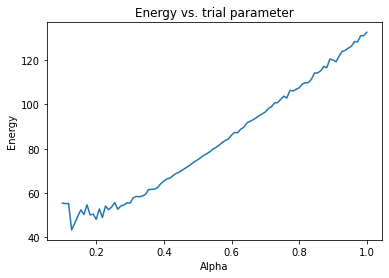

no of particles : 50
Appproximate Ground State Energy =  43.40380761082773
 :  0.1272727272727273


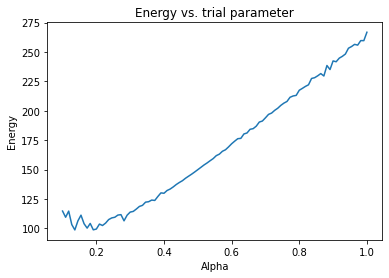

no of particles : 100
Appproximate Ground State Energy =  98.78475901946786
 :  0.13636363636363635


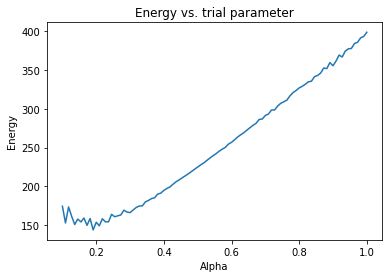

no of particles : 150
Appproximate Ground State Energy =  144.1083553896443
 :  0.19090909090909092


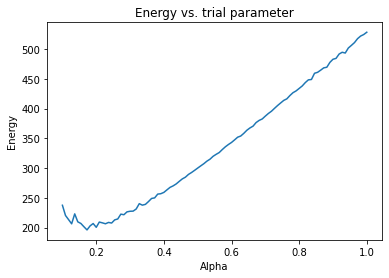

no of particles : 200
Appproximate Ground State Energy =  196.02252336887344
 :  0.17272727272727273


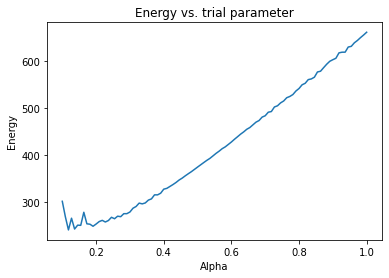

no of particles : 250
Appproximate Ground State Energy =  241.17420373415425
 :  0.1181818181818182


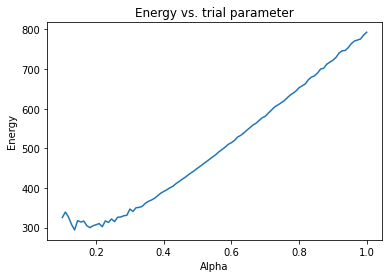

no of particles : 300
Appproximate Ground State Energy =  294.1239053626566
 :  0.13636363636363635


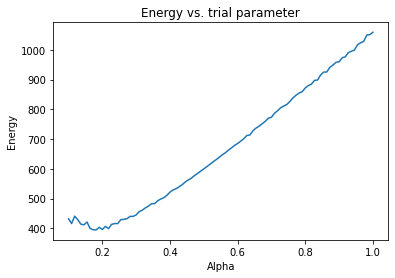

no of particles : 400
Appproximate Ground State Energy =  394.9582301232222
 :  0.18181818181818182


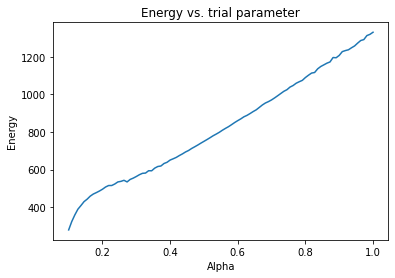

no of particles : 500
Appproximate Ground State Energy =  279.36798116948756
 :  0.1


In [7]:
alpha_space = np.linspace(0.1, 1, 100)
N_arr = np.array([50,100,150,200,250,300,400,500])
Earr = np.array([])
for N in N_arr:
  E_arr = np.array([])
  for alpha in alpha_space:
    E = VMC(alpha, N)
    E_arr = np.append(E_arr, E)
  plt.plot(alpha_space, E_arr)
  plt.title('Energy vs. trial parameter')
  plt.xlabel('Alpha')
  plt.ylabel('Energy')
  plt.show()
  E_ground = np.min(E_arr)
  Earr = np.append(Earr, E_ground)
  min_id = np.argmin(E_arr)
  min_alpha = alpha_space[min_id]
  print('no of particles :', N)
  print("Appproximate Ground State Energy = ", E_ground)
  print(' : ', min_alpha)

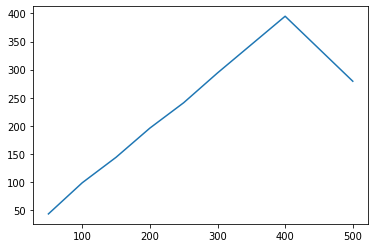

In [8]:
plt.plot(N_arr,Earr)

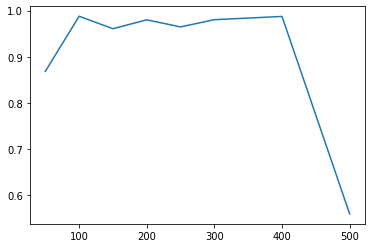

In [10]:
plt.plot(N_arr, Earr/N_arr)